# Lung Cancer Classification - Project

### Introdução(?)
falta:
- introducao
- graficos de comparacao dos algortimos(histogramas,roc curves

#### Biblioteca

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.animation as manim
from skimage.measure import find_contours
import pylidc as pyl
from pylidc.utils import consensus
import SimpleITK as sitk
from radiomics import featureextractor

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm


C:\Users\beatr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Visualização dos DataSets

In [2]:
df1 = pd.read_csv('LIDC-IDRI_MetaData.csv')
df1_sorted = df1.sort_values(by='Subject ID')
df1_sorted

,Subject ID,Study UID,Study Description,Study Date,Series ID,Series Description,Number of images,File Size (Bytes),Collection Name,Modality,Manufacturer
348,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...,NaN,133,70018838,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
186,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818...,NaN,2,16357620,LIDC-IDRI,DX,GE MEDICAL SYSTEMS
1100,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900...,NaN,1,6909958,LIDC-IDRI,DX,GE MEDICAL SYSTEMS
1141,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...,NaN,261,137396696,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
189,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.202063331127...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.142026812390...,NaN,5,38580794,LIDC-IDRI,DX,GE MEDICAL SYSTEMS
...,...,...,...,...,...,...,...,...,...,...,...
990,LIDC-IDRI-1008,1.3.6.1.4.1.14519.5.2.1.6279.6001.339975625902...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.332510758903...,NaN,115,60517648,LIDC-IDRI,CT,TOSHIBA
1248,LIDC-IDRI-1009,1.3.6.1.4.1.14519.5.2.1.6279.6001.849069697860...,CT THORAX W/CONTRAST,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.855232435861...,Recon 2: CHEST,125,65830674,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
1120,LIDC-IDRI-1010,1.3.6.1.4.1.14519.5.2.1.6279.6001.145373944605...,CT ANGIO CHEST (NON-CO,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.550599855064...,BOTTOM TO TOP,252,132720966,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
749,LIDC-IDRI-1011,1.3.6.1.4.1.14519.5.2.1.6279.6001.287560874054...,CT THORAX W/CONTRAST,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.272123398257...,CHEST,133,70030058,LIDC-IDRI,CT,GE MEDICAL SYSTEMS


Este dataset contém informações relativas às imagens radiógicas, as quais não são relevantes ao estudo dos nódulos em si.

In [3]:
df2 = pd.read_excel('lidc-idri nodule counts (6-23-2015).xlsx')
df2_sorted = df2.sort_values(by='TCIA Patent ID')
df2_sorted

,TCIA Patent ID,Total Number of Nodules*,Number of Nodules >=3mm**,Number of Nodules <3mm***,Unnamed: 4,Unnamed: 5
0,LIDC-IDRI-0001,4,1,3,NaN,NaN
1,LIDC-IDRI-0002,12,1,11,NaN,*total number of lesions that received either ...
2,LIDC-IDRI-0003,4,4,0,NaN,"**total number of lesions that received a ""nod..."
3,LIDC-IDRI-0004,4,1,3,NaN,"***total number of lesions that received a ""no..."
4,LIDC-IDRI-0005,9,3,6,NaN,NaN
...,...,...,...,...,...,...
1014,LIDC-IDRI-1009,2,1,1,NaN,NaN
1015,LIDC-IDRI-1010,10,1,9,NaN,NaN
1016,LIDC-IDRI-1011,4,4,0,NaN,NaN
1017,LIDC-IDRI-1012,1,1,0,NaN,NaN


Este segundo dataset é também irrelevante para o nosso estudo uma vez que não contém informações de cada nódulo.

In [4]:
df3 = pd.read_excel('tcia-diagnosis-data-2012-04-20.xls')
df3_sorted = df3.sort_values(by='TCIA Patient ID')
df3_sorted

,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,LIDC-IDRI-0994,2,3,LUL Large cell CA,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,LIDC-IDRI-1002,2,2,non-small cell carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,LIDC-IDRI-1004,2,3,LUL NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,LIDC-IDRI-1010,0,0,lymphoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A uma primeira análise, considerámos este dataset importante para o nosso projeto. A coluna "Diagnosis at the Patient Level..." poderia ser considerada como a nossa target, e as colunas "Nodule 1\nDiagnosis at the Nodule Level..." e "Nodule 2\nDiagnosis at the Nodule Level..." pareceram-nos também conter informações importantes. Contudo, na extração de features com pylidc, ficamos na dúvido se as informações relativamente ao nódulo 1, por exemplo, iriam corresponder ao mesmo nódulo 1 do pylidc. Desta maneira, optamos por descartar também este dataset e criar um apenas com as features extraídas com pylidc e pyradiomics.

### Extração das features Pylidc

In [5]:
#para percorrer todos os pacientes no banco de dados PyLIDC

subtlety=[]
internalStructure=[]
calcification=[]
sphericity=[]
margin=[]
lobulation=[]
spiculation=[]
texture=[]
malignancy=[]
nodulo_id=[]

nod_id=-1

for scan in pyl.query(pyl.Scan):
    
    nods = scan.cluster_annotations()
    
    if nods:
        for nod in nods:
            nod_id+=1
            
            anns_subtlety=0
            anns_Structure=0
            anns_calcification=0
            anns_sphericity=0
            anns_margin=0
            anns_lobulation=0
            anns_spiculation=0
            anns_texture=0
            anns_malignancy=0
            
            for anns in nod:
                anns_subtlety+=anns.subtlety
                anns_Structure+=anns.internalStructure
                anns_calcification+=anns.calcification
                anns_sphericity+=anns.sphericity
                anns_margin+=anns.margin
                anns_lobulation+=anns.lobulation
                anns_spiculation+=anns.spiculation
                anns_texture+=anns.texture
                anns_malignancy+=anns.malignancy
            
            
            num_ann=len(nod) 
            subtlety.append(anns_subtlety/num_ann)
            internalStructure.append(anns_Structure/num_ann)
            calcification.append(anns_calcification/num_ann)
            sphericity.append(anns_sphericity/num_ann)
            margin.append(anns_margin/num_ann)
            lobulation.append(anns_lobulation/num_ann)
            spiculation.append(anns_spiculation/num_ann)
            texture.append(anns_texture/num_ann)
            malignancy.append(anns_malignancy/num_ann)
            nodulo_id.append(nod_id)
        
    else:
        pass
        

        
#criar o DataFrame
data={'Nodulo_id':nodulo_id,'Sutlety':subtlety,'Internal_Structure':internalStructure,'Calcification':calcification,'Sphericity':sphericity,'Margin':margin,'Lobulation':lobulation,'Spiculation':spiculation,'Texture':texture,'Malignancy':malignancy}
df=pd.DataFrame(data)
            
            
        
        
        
        
    

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [6]:
df

,Nodulo_id,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy
0,0,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75
1,1,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75
2,2,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00
3,3,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25
4,4,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25
...,...,...,...,...,...,...,...,...,...,...
2646,2646,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00
2647,2647,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50
2648,2648,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50
2649,2649,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00


##### Criação da Target

In [9]:
conditions = [
    (df['Malignancy'] >= 3.5),
    (df['Malignancy'] < 2.5),
    (df['Malignancy'] >= 2.5) & (df['Malignancy'] < 3.5)
]

choices = ['Yes', 'No', 'Indeterminate']

df['Target'] = np.select(conditions, choices, default='')
df['Target'], _ = pd.factorize(df['Target'])
df2=df.copy()
df

,Nodulo_id,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy,Target
0,0,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75,0
1,1,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75,0
2,2,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00,1
3,3,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25,0
4,4,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25,2
...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00,0
2647,2647,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50,0
2648,2648,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50,0
2649,2649,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00,1


##### Matriz de correlação

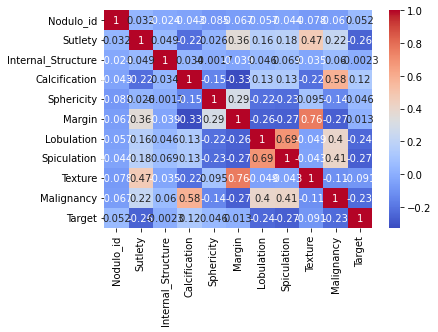

In [10]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Extração das features PyRadiomics

In [11]:
import pylidc as pl
# configura o extrator de características do PyRadiomics sem o arquivo params.yaml
extractor = featureextractor.RadiomicsFeatureExtractor()

scans_with_annotations = pl.query(pl.Scan).filter(pl.Scan.annotations.any()).all()

# lista para armazenar as características
features_list = []
patient_ids = []

# variável para criar ids dos nódulos
nodule_id_counter = 0

for scan in scans_with_annotations:
    patient_id = scan.patient_id
   
    # separacao de nodulos
    nods = scan.cluster_annotations()
    for anns in nods:
        # Realize a consolidação de consenso e nível de acordo de 50%
        cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(20, 20), (20, 20), (0, 0)])
       
        # converter a matriz de pixels para uma imagem
        image = sitk.GetImageFromArray(cmask.astype(float))
       
        # extrair características usando pyradiomics
        features = extractor.execute(image, image, label=1) 
        patient_ids.append(patient_id)
        features['Nodulo_id'] = nodule_id_counter
        nodule_id_counter += 1
       
        features_list.append(features)

features_df = pd.DataFrame(features_list)


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [12]:
features_df

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Nodulo_id
0,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},966db6c8d814983bbfe7125907b2ae5008c7994e,3D,"(1.0, 1.0, 1.0)",...,2.7613561461850897e-07,-3.203426503814917e-16,0.0005254860746190226,0.0,0.0,1000000.0,0.0,0.0,0.0,0
1,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},d750f93365c734f6f1972e806b046bb1a203f47f,3D,"(1.0, 1.0, 1.0)",...,3.299153008448141e-07,-3.203426503814917e-16,0.0005743825387708214,0.0,0.0,1000000.0,0.0,0.0,0.0,1
2,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},58d9ee5073ad7215556c1e295a67e9204a623b2d,3D,"(1.0, 1.0, 1.0)",...,0.0008650519031141869,-3.203426503814917e-16,0.029411764705882353,0.0,0.0,1000000.0,0.0,0.0,0.0,2
3,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},312913e3e22bc6f2e6cffc8abd1120da5fa413fd,3D,"(1.0, 1.0, 1.0)",...,0.6666666917694576,0.9182958340544889,0.0008228195282501371,2949210.888888889,0.0,1000000.0,0.0,0.0,0.0,3
4,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},08706c40effcb9f7489dc9ce0139a265b8dc6048,3D,"(1.0, 1.0, 1.0)",...,3.6840418359790892e-06,-3.203426503814917e-16,0.0019193857965451055,0.0,0.0,1000000.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},db18dcbfdf1ebd1c1390db9dd1fbfd85cce4724b,3D,"(1.0, 1.0, 1.0)",...,9.467455621301774e-06,-3.203426503814917e-16,0.003076923076923077,0.0,0.0,1000000.0,0.0,0.0,0.0,2646
2647,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},fe63df501e056c7f875ab771151194481c70a0b1,3D,"(1.0, 1.0, 1.0)",...,2.5764629800916708e-06,-3.203426503814917e-16,0.0016051364365971107,0.0,0.0,1000000.0,0.0,0.0,0.0,2647
2648,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},e25d0da08cbc45ea3587c9426cc102940176a4de,3D,"(1.0, 1.0, 1.0)",...,2.7994736989445986e-05,-3.203426503814917e-16,0.005291005291005291,0.0,0.0,1000000.0,0.0,0.0,0.0,2648
2649,v3.1.0,1.23.5,2.3.0,1.3.0,3.9.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5888efc13966913742433819826d00f4d79f0c24,3D,"(1.0, 1.0, 1.0)",...,0.00016866250632484398,-3.203426503814917e-16,0.012987012987012988,0.0,0.0,1000000.0,0.0,0.0,0.0,2649


In [13]:
df_pca=pd.merge(df2, features_df, on='Nodulo_id')

In [14]:
features_df.columns

Index(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing',
       ...
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'Nodulo_id'],
      dtype='object', length=130)

In [15]:
# Quantas sao numericas
num_colunas_numericas = len(features_df.select_dtypes(include=['number']).columns)

print(f"O DataFrame possui {num_colunas_numericas} colunas numéricas")

O DataFrame possui 12 colunas numéricas


In [16]:
# Quantas sao nao numericas
num_colunas_non_numericas = len(features_df.select_dtypes(exclude=['number']).columns)

print(f"O DataFrame possui {num_colunas_non_numericas} colunas não numéricas")

O DataFrame possui 118 colunas não numéricas


In [17]:
features_df.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_MinorAxisLength,original_shape_VoxelVolume,Nodulo_id
count,2651.000000,2651.0,2651.0,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000
mean,0.018546,0.0,1.0,767.754055,1.030177,0.758962,0.375975,4.365222,12.369813,9.118343,767.754055,1325.000000
std,0.015681,0.0,0.0,2146.458892,0.373452,0.130097,0.179068,3.315755,8.295844,5.788493,2146.458892,765.422106
min,0.000842,0.0,1.0,5.000000,1.000000,0.259786,0.000000,0.000000,2.529822,2.285576,5.000000,0.000000
25%,0.008952,0.0,1.0,74.000000,1.000000,0.679440,0.247986,2.374696,7.246937,5.540767,74.000000,662.500000
50%,0.013310,0.0,1.0,148.000000,1.000000,0.777843,0.346953,3.541325,9.570036,7.097688,148.000000,1325.000000
75%,0.022074,0.0,1.0,417.500000,1.000000,0.858373,0.497471,5.174388,13.904928,10.233132,417.500000,1987.500000
max,0.126805,0.0,1.0,45329.000000,17.000000,0.995478,0.909017,35.444088,65.112626,45.209982,45329.000000,2650.000000


In [18]:
df_pca

,Nodulo_id,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75,...,2.7613561461850897e-07,2.7613561461850897e-07,-3.203426503814917e-16,0.0005254860746190226,0.0,0.0,1000000.0,0.0,0.0,0.0
1,1,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75,...,3.299153008448141e-07,3.299153008448141e-07,-3.203426503814917e-16,0.0005743825387708214,0.0,0.0,1000000.0,0.0,0.0,0.0
2,2,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00,...,0.0008650519031141869,0.0008650519031141869,-3.203426503814917e-16,0.029411764705882353,0.0,0.0,1000000.0,0.0,0.0,0.0
3,3,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25,...,0.6666666917694576,0.6666666917694576,0.9182958340544889,0.0008228195282501371,2949210.888888889,0.0,1000000.0,0.0,0.0,0.0
4,4,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25,...,3.6840418359790892e-06,3.6840418359790892e-06,-3.203426503814917e-16,0.0019193857965451055,0.0,0.0,1000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00,...,9.467455621301774e-06,9.467455621301774e-06,-3.203426503814917e-16,0.003076923076923077,0.0,0.0,1000000.0,0.0,0.0,0.0
2647,2647,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50,...,2.5764629800916708e-06,2.5764629800916708e-06,-3.203426503814917e-16,0.0016051364365971107,0.0,0.0,1000000.0,0.0,0.0,0.0
2648,2648,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50,...,2.7994736989445986e-05,2.7994736989445986e-05,-3.203426503814917e-16,0.005291005291005291,0.0,0.0,1000000.0,0.0,0.0,0.0
2649,2649,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00,...,0.00016866250632484398,0.00016866250632484398,-3.203426503814917e-16,0.012987012987012988,0.0,0.0,1000000.0,0.0,0.0,0.0


##### Transformação de algumas colunas type object a numéricas

In [19]:
colunas_object = []

for coluna in features_df.columns:
    if features_df[coluna].dtype == 'object':
        colunas_object.append(coluna)

colunas_ndarray=[]
for coluna in colunas_object:
    if isinstance(features_df[coluna].iloc[0], np.ndarray):
        #  o primeiro valor é um numpy.ndarray
        colunas_ndarray.append(coluna)
        

# Iterar sobre as colunas com numpy.ndarray e aplicar a conversão e factorização
for coluna in colunas_ndarray:
    features_df[coluna] = features_df[coluna].apply(lambda arr: str(arr))
    features_df[coluna], _ = pd.factorize(features_df[coluna])

#### Junção das features do Pylidc com PyRadiomics

In [20]:
df['Nodulo_id']=df['Nodulo_id'].astype(int)

df = pd.merge(df, features_df, on='Nodulo_id')
df

,Nodulo_id,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75,...,0,0,0,0,0,0,0,0,0,0
1,1,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75,...,1,1,0,1,0,0,0,0,0,0
2,2,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00,...,2,2,0,2,0,0,0,0,0,0
3,3,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25,...,3,3,1,3,1,0,0,0,0,0
4,4,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25,...,4,4,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00,...,959,959,0,948,0,0,0,0,0,0
2647,2647,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50,...,960,960,0,949,0,0,0,0,0,0
2648,2648,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50,...,724,724,0,719,0,0,0,0,0,0
2649,2649,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00,...,108,108,0,108,0,0,0,0,0,0


In [21]:
# Quantas sao numericas
num_colunas_numericas = len(df.select_dtypes(include=['number']).columns)

print(f"O DataFrame possui {num_colunas_numericas} colunas numéricas")

O DataFrame possui 123 colunas numéricas


In [22]:
colunas_nao_numericas = df.select_dtypes(exclude=['number']).columns
print(colunas_nao_numericas)

Index(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing',
       'diagnostics_Mask-original_Size',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_CenterOfMass'],
      dtype='object')


In [23]:
df = df.drop(columns=colunas_nao_numericas)


### Sem aplicar nenhum método para extração das melhores features

#### Naive Bayes

In [24]:
X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)
X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

Accuracy: 56.12%
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       104
           1       0.53      0.73      0.62       185
           2       0.56      0.41      0.47       242

    accuracy                           0.56       531
   macro avg       0.58      0.58      0.57       531
weighted avg       0.56      0.56      0.55       531



#### Ensemble Stacking

In [25]:
X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)
X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model1 = GaussianNB()
base_model2 = DecisionTreeClassifier(random_state=42)

meta_model = GaussianNB()

stacking_model = StackingClassifier(
    estimators=[('nb', base_model1), ('dt', base_model2)],
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy: 58.76%
              precision    recall  f1-score   support

           0       0.63      0.75      0.69       104
           1       0.56      0.68      0.61       185
           2       0.59      0.45      0.51       242

    accuracy                           0.59       531
   macro avg       0.59      0.63      0.60       531
weighted avg       0.59      0.59      0.58       531



#### Decision Tree

In [26]:
X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)
X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Accuracy: 59.13%
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       104
           1       0.58      0.64      0.61       185
           2       0.58      0.55      0.56       242

    accuracy                           0.59       531
   macro avg       0.60      0.60      0.60       531
weighted avg       0.59      0.59      0.59       531



#### Logistic Regression

In [27]:
X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)
X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Accuracy: 51.60%
              precision    recall  f1-score   support

           0       0.54      0.68      0.60       104
           1       0.65      0.06      0.11       185
           2       0.50      0.79      0.61       242

    accuracy                           0.52       531
   macro avg       0.56      0.51      0.44       531
weighted avg       0.56      0.52      0.44       531



C:\Users\beatr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### SVM

In [28]:
X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)
X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy: 69.30%
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        93
           1       0.77      0.53      0.63       178
           2       0.66      0.80      0.72       260

    accuracy                           0.69       531
   macro avg       0.72      0.68      0.69       531
weighted avg       0.71      0.69      0.69       531



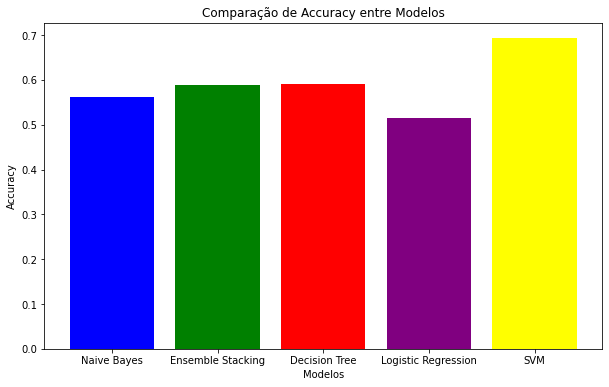

In [52]:

model_names = ['Naive Bayes', 'Ensemble Stacking', 'Decision Tree', 'Logistic Regression', 'SVM']
accuracies = [0.5612, 0.5876, 0.5913, 0.5160, 0.6930]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple','yellow'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()


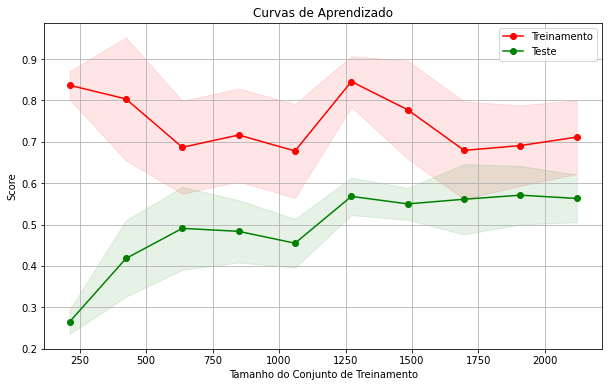

In [29]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(stacking_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Curvas de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")
plt.legend(loc="best")
plt.show()


## Escolha de Features

### Random Forest

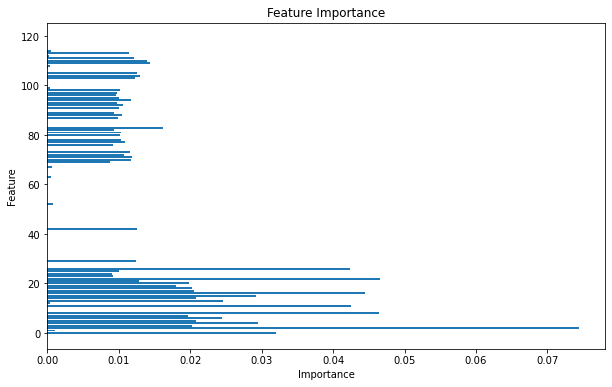

In [30]:

X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)
X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target'] 

imputer = SimpleImputer(strategy='mean')#o que é?
X = imputer.fit_transform(X)
#recuperar
column_names = X_original.select_dtypes(include=['number']).columns

X = pd.DataFrame(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# importancias das features
feature_importances = rf_model.feature_importances_

# dataset com as importancias e nomes das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# odenar as features pela importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# grafico de barras das importancias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [31]:
feature_importance_df['Feature'] = column_names[feature_importance_df['Feature']]

print(feature_importance_df)

                                Feature  Importance
2                         Calcification    0.074385
22       original_shape_MinorAxisLength    0.046496
8       diagnostics_Image-original_Mean    0.046426
16       original_shape_MajorAxisLength    0.044493
11   diagnostics_Mask-original_VoxelNum    0.042516
..                                  ...         ...
51      original_glcm_DifferenceAverage    0.000000
50            original_glcm_Correlation    0.000000
49               original_glcm_Contrast    0.000000
48        original_glcm_ClusterTendency    0.000000
119             original_ngtdm_Strength    0.000000

[120 rows x 2 columns]


In [32]:
feature_importance_df.to_csv('feature_importance.csv', index=False)
feature_importance = pd.read_csv('feature_importance.csv')
feature_importance

,Feature,Importance
0,Calcification,0.074385
1,original_shape_MinorAxisLength,0.046496
2,diagnostics_Image-original_Mean,0.046426
3,original_shape_MajorAxisLength,0.044493
4,diagnostics_Mask-original_VoxelNum,0.042516
...,...,...
115,original_glcm_DifferenceAverage,0.000000
116,original_glcm_Correlation,0.000000
117,original_glcm_Contrast,0.000000
118,original_glcm_ClusterTendency,0.000000


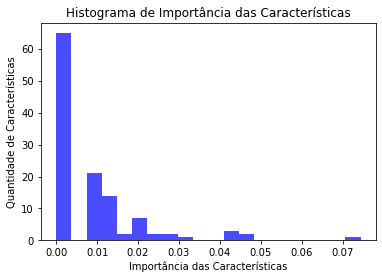

In [33]:
plt.hist(feature_importance["Importance"], bins=20, color='blue', alpha=0.7)
plt.xlabel("Importância das Características")
plt.ylabel("Quantidade de Características")
plt.title("Histograma de Importância das Características")
plt.show()


In [34]:
selected_features = feature_importance[feature_importance["Importance"] >= 0.015]

In [35]:
selected_features

,Feature,Importance
0,Calcification,0.074385
1,original_shape_MinorAxisLength,0.046496
2,diagnostics_Image-original_Mean,0.046426
3,original_shape_MajorAxisLength,0.044493
4,diagnostics_Mask-original_VoxelNum,0.042516
5,original_shape_VoxelVolume,0.042296
6,Sutlety,0.032066
7,Margin,0.029437
8,original_shape_LeastAxisLength,0.029202
9,original_shape_Elongation,0.024639


In [36]:
selected_columns = selected_features['Feature'].tolist()
df_selected = df[selected_columns]
df_selected

,Calcification,original_shape_MinorAxisLength,diagnostics_Image-original_Mean,original_shape_MajorAxisLength,diagnostics_Mask-original_VoxelNum,original_shape_VoxelVolume,Sutlety,Margin,original_shape_LeastAxisLength,original_shape_Elongation,Spiculation,original_shape_Flatness,Lobulation,original_shape_Maximum2DDiameterColumn,Sphericity,original_shape_Maximum2DDiameterRow,original_shape_Maximum3DDiameter,Texture,original_shape_Maximum2DDiameterSlice,original_glrlm_GrayLevelNonUniformity
0,6.0,21.474857,0.051024,25.306411,1903,1903.0,4.500000,3.250000,5.542891,0.848594,2.25,0.219031,2.250000,0,4.000000,0,0,4.750000,0,0
1,6.0,20.477091,0.054136,24.222923,1741,1741.0,4.750000,2.750000,5.209030,0.845360,2.25,0.215045,3.000000,1,4.000000,1,1,4.500000,1,1
2,5.0,4.958806,0.007535,5.639429,34,34.0,4.000000,5.000000,1.632763,0.879310,1.00,0.289526,1.000000,2,5.000000,2,2,5.000000,2,2
3,5.0,28.419506,0.063299,29.700850,3646,3646.0,5.000000,3.250000,6.435946,0.956858,2.75,0.216692,3.250000,3,3.750000,3,3,4.750000,3,3
4,6.0,9.653513,0.014866,12.378110,521,521.0,2.500000,4.250000,7.374952,0.779886,4.00,0.595806,4.000000,4,4.500000,4,4,4.750000,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,6.0,9.595771,0.010188,12.087678,325,325.0,4.333333,2.333333,4.534490,0.793847,3.00,0.375133,2.333333,217,3.666667,48,394,3.333333,205,1367
2647,6.0,9.416961,0.019069,12.485120,623,623.0,2.500000,2.000000,8.589183,0.754255,1.50,0.687954,1.000000,227,4.500000,85,292,1.000000,180,1480
2648,6.0,7.855304,0.020854,13.922612,189,189.0,3.000000,3.500000,2.586515,0.564212,1.00,0.185778,1.500000,17,3.500000,108,453,5.000000,47,484
2649,6.0,4.521458,0.007404,9.970706,77,77.0,5.000000,5.000000,2.471175,0.453474,1.00,0.247844,1.000000,32,4.000000,58,400,5.000000,110,1331


#### Naive Bayes

In [37]:

X = df_selected
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Accuracy: 64.07%
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       149
           1       0.65      0.64      0.64       271
           2       0.63      0.65      0.64       376

    accuracy                           0.64       796
   macro avg       0.65      0.64      0.64       796
weighted avg       0.64      0.64      0.64       796



#### Ensemble Stacking

In [38]:

X = df_selected
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

base_model1 = GaussianNB()
base_model2 = DecisionTreeClassifier(random_state=42)

meta_model = GaussianNB()

stacking_model = StackingClassifier(
    estimators=[('nb', base_model1), ('rf', base_model2)],
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Accuracy: 61.68%
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       141
           1       0.59      0.62      0.60       258
           2       0.64      0.60      0.62       397

    accuracy                           0.62       796
   macro avg       0.61      0.63      0.62       796
weighted avg       0.62      0.62      0.62       796



#### Decision Tree

In [39]:
X = df_selected
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Accuracy: 61.39%
              precision    recall  f1-score   support

           0       0.62      0.67      0.65       104
           1       0.61      0.62      0.61       185
           2       0.61      0.59      0.60       242

    accuracy                           0.61       531
   macro avg       0.61      0.63      0.62       531
weighted avg       0.61      0.61      0.61       531



#### Logistic Regression

In [40]:
X = df_selected
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Accuracy: 52.17%
              precision    recall  f1-score   support

           0       0.69      0.48      0.57       104
           1       0.57      0.04      0.08       185
           2       0.49      0.90      0.64       242

    accuracy                           0.52       531
   macro avg       0.59      0.48      0.43       531
weighted avg       0.56      0.52      0.43       531



C:\Users\beatr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### SVM

In [41]:
X = df_selected
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy: 69.22%
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       141
           1       0.78      0.52      0.62       258
           2       0.67      0.80      0.73       397

    accuracy                           0.69       796
   macro avg       0.71      0.67      0.68       796
weighted avg       0.70      0.69      0.69       796



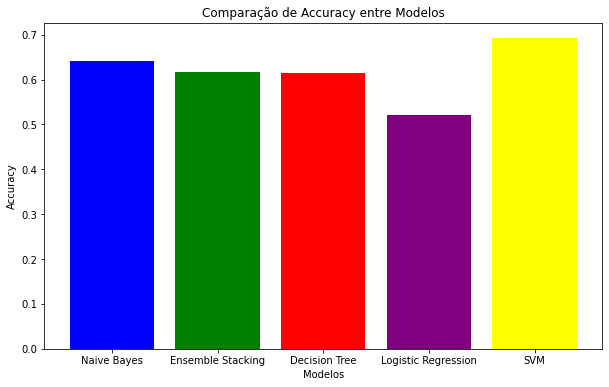

In [53]:
model_names = ['Naive Bayes', 'Ensemble Stacking', 'Decision Tree', 'Logistic Regression', 'SVM']
accuracies = [0.6407, 0.6168, 0.6139, 0.5217, 0.6922]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple','yellow'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()

### PCA

In [42]:
X_original = df_pca.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)


# substituir por 0 os valores null
X = X_original.select_dtypes(include=['number'])
X = X.fillna(0)
 
n_components = 9
pca = PCA(n_components=n_components)

# ajustar PCA aos dados 
X_pca = pca.fit_transform(X)
components = pca.components_


In [43]:
for i, component in enumerate(components):
    print(f"Características mais importantes no Componente Principal {i + 1}:")
    feature_indices = np.argsort(np.abs(component))[::-1]
    
    for j in feature_indices:
        feature_name = X.columns[j]
        feature_coefficient = component[j]
        print(f"{feature_name}: {feature_coefficient}")


Características mais importantes no Componente Principal 1:
original_shape_VoxelVolume: 0.7071041988909353
diagnostics_Mask-original_VoxelNum: 0.7071041988909353
original_shape_MajorAxisLength: 0.0020690148975773767
original_shape_MinorAxisLength: 0.0014971460863133644
original_shape_LeastAxisLength: 0.0008688385074211931
Sutlety: 9.768420975190148e-05
Spiculation: 8.023508273150742e-05
Lobulation: 7.701168131001966e-05
diagnostics_Mask-original_VolumeNum: 5.6855526539337986e-05
Margin: -3.328948883426775e-05
Sphericity: -1.3902116058431605e-05
Calcification: 1.1089447549367075e-05
Texture: 8.309684002981197e-06
diagnostics_Image-original_Mean: 3.578014760672397e-06
original_shape_Flatness: 3.5689905547385567e-06
Internal_Structure: 3.008692033674123e-06
original_shape_Elongation: -9.558097059875718e-07
diagnostics_Image-original_Maximum: 0.0
diagnostics_Image-original_Minimum: 0.0
Características mais importantes no Componente Principal 2:
original_shape_MajorAxisLength: -0.8470958830

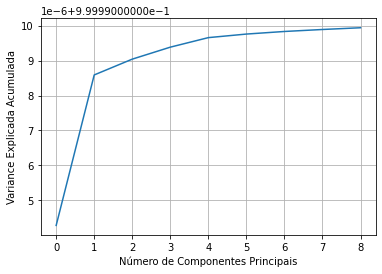

In [44]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance)
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variance Explicada Acumulada')
plt.grid()
plt.show()

#### Naive Bayes

In [45]:

X = X_pca
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Accuracy: 69.87%
              precision    recall  f1-score   support

           0       0.72      0.58      0.64        93
           1       0.76      0.60      0.67       178
           2       0.66      0.81      0.73       260

    accuracy                           0.70       531
   macro avg       0.72      0.66      0.68       531
weighted avg       0.71      0.70      0.70       531



a alteração do random_state altera a accuracy porque(?)
estava com random_state=42

#### Ensemble Stacking

In [46]:
X = X_pca
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

base_model1 = GaussianNB()
base_model2 = DecisionTreeClassifier(random_state=42)

meta_model = GaussianNB()

stacking_model = StackingClassifier(
    estimators=[('nb', base_model1), ('rf', base_model2)],
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy: 66.67%
              precision    recall  f1-score   support

           0       0.53      0.70      0.60        93
           1       0.71      0.68      0.69       178
           2       0.71      0.65      0.67       260

    accuracy                           0.67       531
   macro avg       0.65      0.67      0.66       531
weighted avg       0.68      0.67      0.67       531



#### Decision Tree

In [47]:
X = X_pca
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
decision_tree_model = DecisionTreeClassifier(random_state=20)

decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy: 59.32%
              precision    recall  f1-score   support

           0       0.52      0.57      0.55        93
           1       0.59      0.61      0.60       178
           2       0.62      0.59      0.60       260

    accuracy                           0.59       531
   macro avg       0.58      0.59      0.58       531
weighted avg       0.60      0.59      0.59       531



#### Logistic Regression

In [48]:
X = X_pca
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy: 70.06%
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        93
           1       0.84      0.51      0.63       178
           2       0.65      0.86      0.74       260

    accuracy                           0.70       531
   macro avg       0.74      0.67      0.68       531
weighted avg       0.73      0.70      0.69       531



C:\Users\beatr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### SVM

In [49]:
X = X_pca
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy: 68.93%
              precision    recall  f1-score   support

           0       0.70      0.71      0.71        93
           1       0.83      0.48      0.60       178
           2       0.64      0.83      0.72       260

    accuracy                           0.69       531
   macro avg       0.72      0.67      0.68       531
weighted avg       0.71      0.69      0.68       531



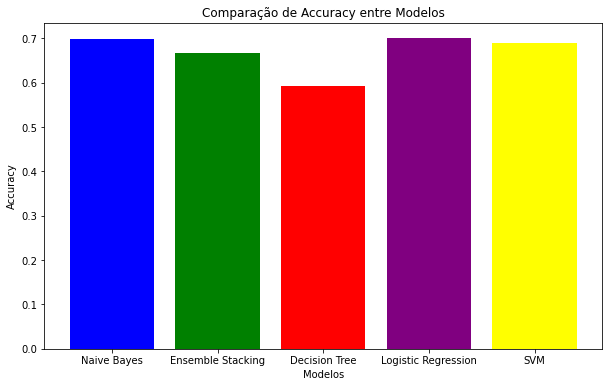

In [54]:
model_names = ['Naive Bayes', 'Ensemble Stacking', 'Decision Tree', 'Logistic Regression', 'SVM']
accuracies = [0.6987, 0.6667, 0.5932, 0.7006, 0.6893]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple','yellow'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()

## Comparação de resultados

### Modelos Naive Bayes

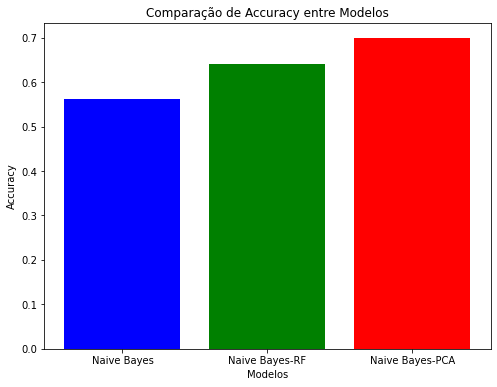

In [59]:
model_names = ['Naive Bayes', 'Naive Bayes-RF', 'Naive Bayes-PCA']
accuracies = [0.5612, 0.6407, 0.6987]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()

### Modelos Ensemble Stacking

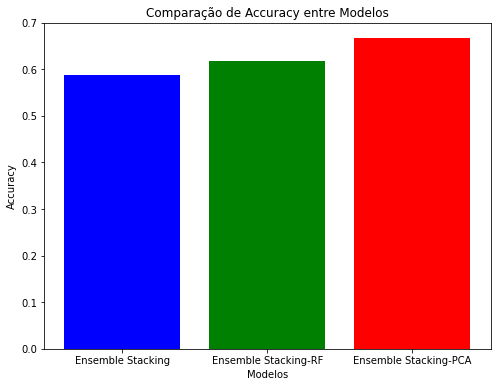

In [58]:
model_names = ['Ensemble Stacking', 'Ensemble Stacking-RF', 'Ensemble Stacking-PCA']
accuracies = [0.5876, 0.6168, 0.6667]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()

### Modelos Decision Tree

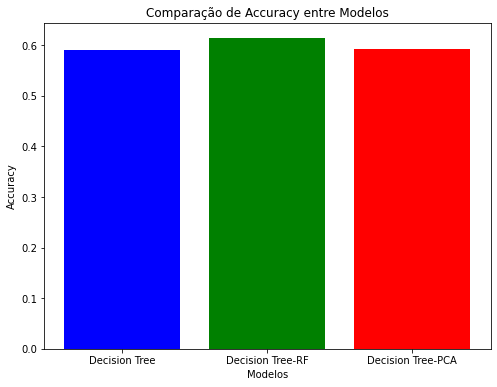

In [60]:
model_names = ['Decision Tree', 'Decision Tree-RF', 'Decision Tree-PCA']
accuracies = [0.5913, 0.6139, 0.5932]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()

### Modelos Logistic Regression

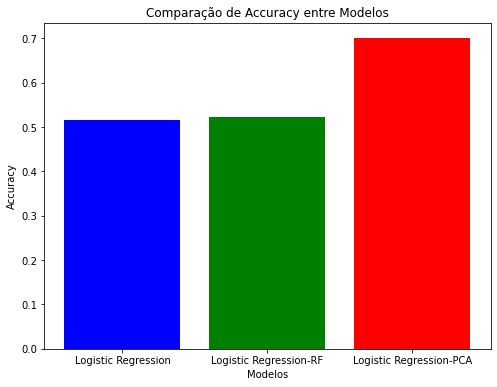

In [61]:
model_names = ['Logistic Regression', 'Logistic Regression-RF', 'Logistic Regression-PCA']
accuracies = [0.6930, 0.5217, 0.7006]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()

### Modelos SVM

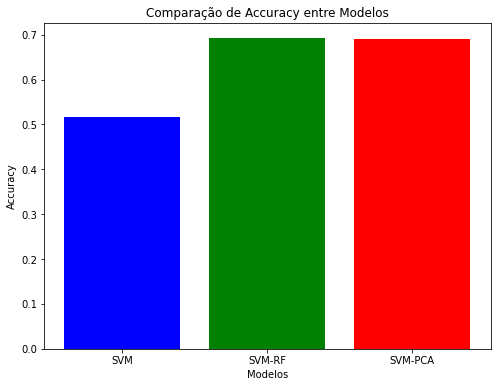

In [62]:
model_names = ['SVM', 'SVM-RF', 'SVM-PCA']
accuracies = [0.5160, 0.6922, 0.6893]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()

### Best Naive Bayes VS Best Ensemble Stacking VS Best Decision Tree Vs Best Logistic Regression VS Best SVM

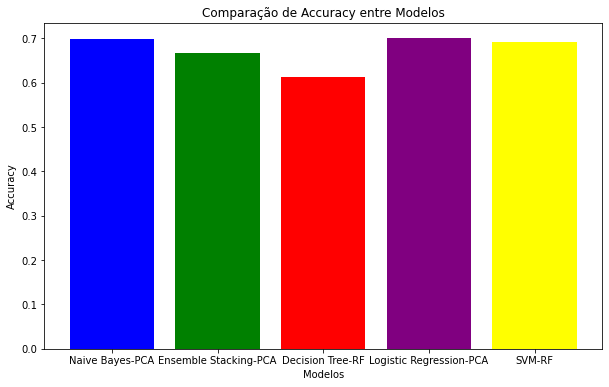

In [64]:
model_names = ['Naive Bayes-PCA','Ensemble Stacking-PCA','Decision Tree-RF','Logistic Regression-PCA', 'SVM-RF']
accuracies = [0.6987, 0.6667, 0.6139, 0.7006, 0.6922]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple','yellow'])


plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparação de Accuracy entre Modelos')

plt.show()

### ROC Curve Logistic Regression-PCA

### Testagens

#### Numero de Componentes vs Accuracy

In [ ]:

X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)


X = X_original.select_dtypes(include=['number'])

X = X.fillna(0)  
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# armazenar accuracies
accuracies = []

for n_components in range(1, 20):  
    pca = PCA(n_components=n_components)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    naive_bayes_model = GaussianNB()

    
    naive_bayes_model.fit(X_train_pca, y_train)

    y_pred = naive_bayes_model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(range(1, 20), accuracies, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. Número de Componentes Principais')
plt.grid()
plt.show()


In [130]:
def plot_ds2D(X,y):
    sns.scatterplot(x=X['Calcification'],y=X['Target'],hue=y,palette="deep")
    plt.show()

In [131]:
X_original = df
X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']
plot_ds2D(X,y)

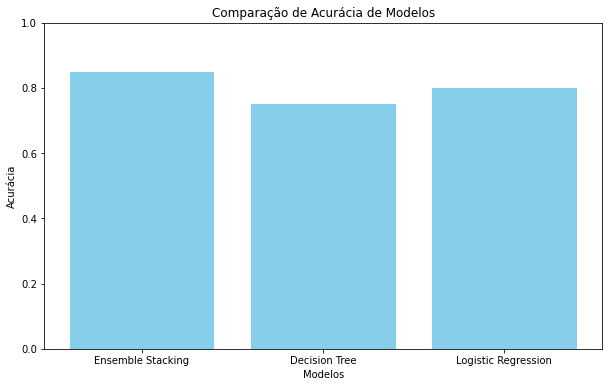

In [187]:
import matplotlib.pyplot as plt

# Acurácia dos modelos
accuracy_svm = 0.85  # Substitua pelo valor real da acurácia do modelo SVM
accuracy_decision_tree = 0.75  # Substitua pelo valor real da acurácia do modelo de Árvore de Decisão
accuracy_logistic_regression = 0.80  # Substitua pelo valor real da acurácia do modelo de Regressão Logística

# Nomes dos modelos
model_names = ['Ensemble Stacking', 'Decision Tree', 'Logistic Regression']

# Valores de acurácia
accuracy_values = [accuracy_svm, accuracy_decision_tree, accuracy_logistic_regression]

# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia de Modelos')
plt.ylim(0, 1)  # Defina o intervalo do eixo y (0 a 1 para acurácia)
plt.show()


In [225]:
n_component=5
pca=PCA(n_components=n_component)
X_pca=pca.fit_transform(X)
components = pca.components_

In [133]:
X=df_pca
pca = PCA()
pca.fit(X)
variance_explained = pca.explained_variance_ratio_

plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Gráfico de Cotovelo (Elbow Plot)')
plt.grid(True)
plt.show()


ValueError: could not convert string to float: 'v3.1.0'